In [2]:
### Flip Robo Technology Project 1
print("*******************************")
print("  Flip Robo Project Phase 1 ")
print("*******************************")
print("  OLUWAJOBA FATOLA  \n  Flip Robo Technology Internship")
print("\n")

*******************************
  Flip Robo Project Phase 1 
*******************************
  OLUWAJOBA FATOLA  
  Flip Robo Technology Internship




In [3]:
print("/////////////////////////////////////\n")
print("Red Wine Quality Prediction Project\n")
print("/////////////////////////////////////\n")

/////////////////////////////////////

Red Wine Quality Prediction Project

/////////////////////////////////////



In [59]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # basic visualization libraries
from IPython.display import display
import qgrid
import eda_activity_monitor as eda_module    # Custom module for Explorative Data Analysis  
%matplotlib inline
from matplotlib  import style
import seaborn as sns #clean columns 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, accuracy_score, f1_score, recall_score, precision_score, roc_auc_score, roc_curve
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV, train_test_split,RandomizedSearchCV
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from imblearn.pipeline import Pipeline
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler, SMOTE, ADASYN
from sklearn.feature_selection import SelectKBest, chi2, f_classif, RFECV
from scipy.stats import mannwhitneyu
import dataframe_image as dfi
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.decomposition import PCA
import skillsnetwork
from scipy.stats import norm
from scipy import stats
from scipy.stats.mstats import winsorize
import tkinter as tk
from tkinter import messagebox

# Data Preprocessing

### Load Data 

In [5]:
# Load the dataset
data = pd.read_csv('winequality-red.csv')

# View the first few rows of the dataset
data.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


### About Data 

In [6]:
# Let's find out how many entries there are in our dataset, using shape function.
data.shape


(1599, 12)

In [7]:
# Get information about the types of data in each column
data_info = data.info()

# Create a DataFrame to display the information
df_info = pd.DataFrame(data_info)

# Display the DataFrame
display(df_info)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


""


In [11]:
data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [12]:
# Separate Red Wine Data
red_wine_data = data.copy()

# Exploratory Data Analysis (EDA)

### Summary Descriptive Statistics of Activity Dataset 

In [8]:
# Generate statistical summaries of the dataset
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


### Data Visualization  

C:\Users\JOBA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


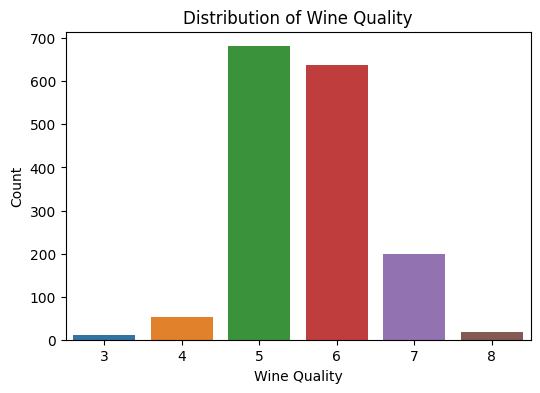

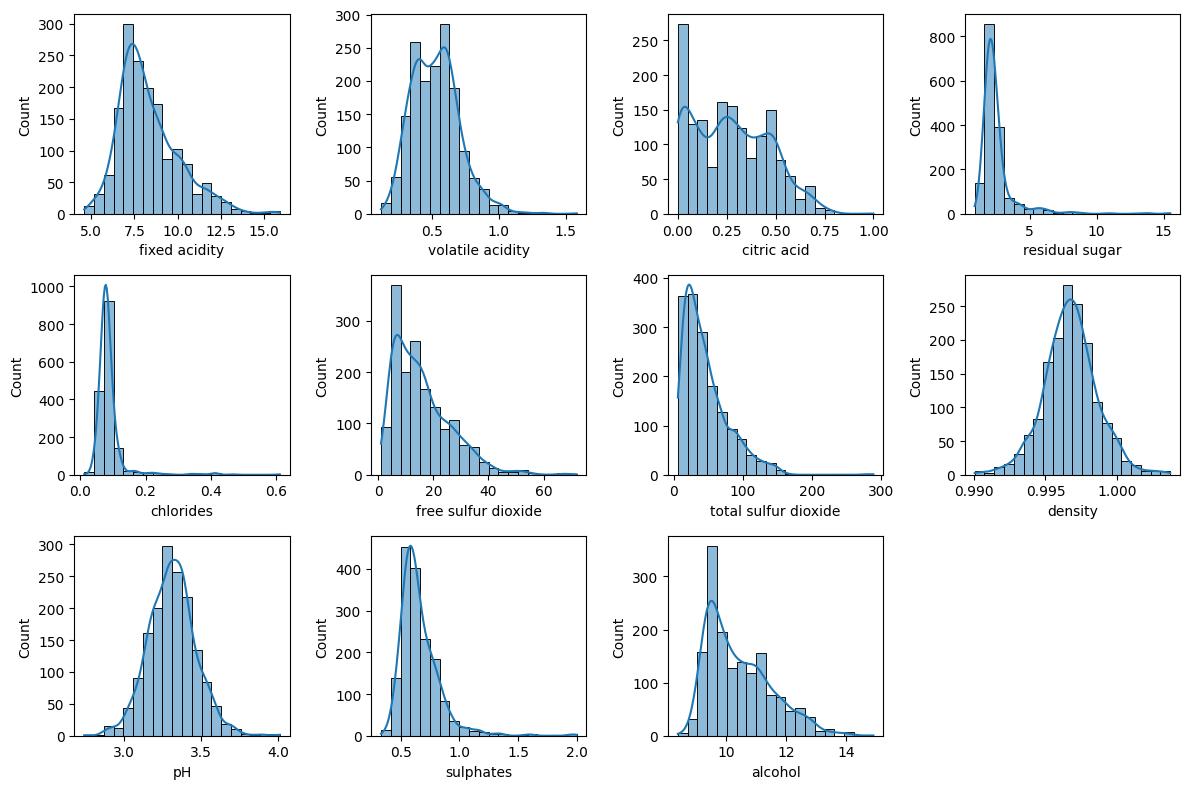

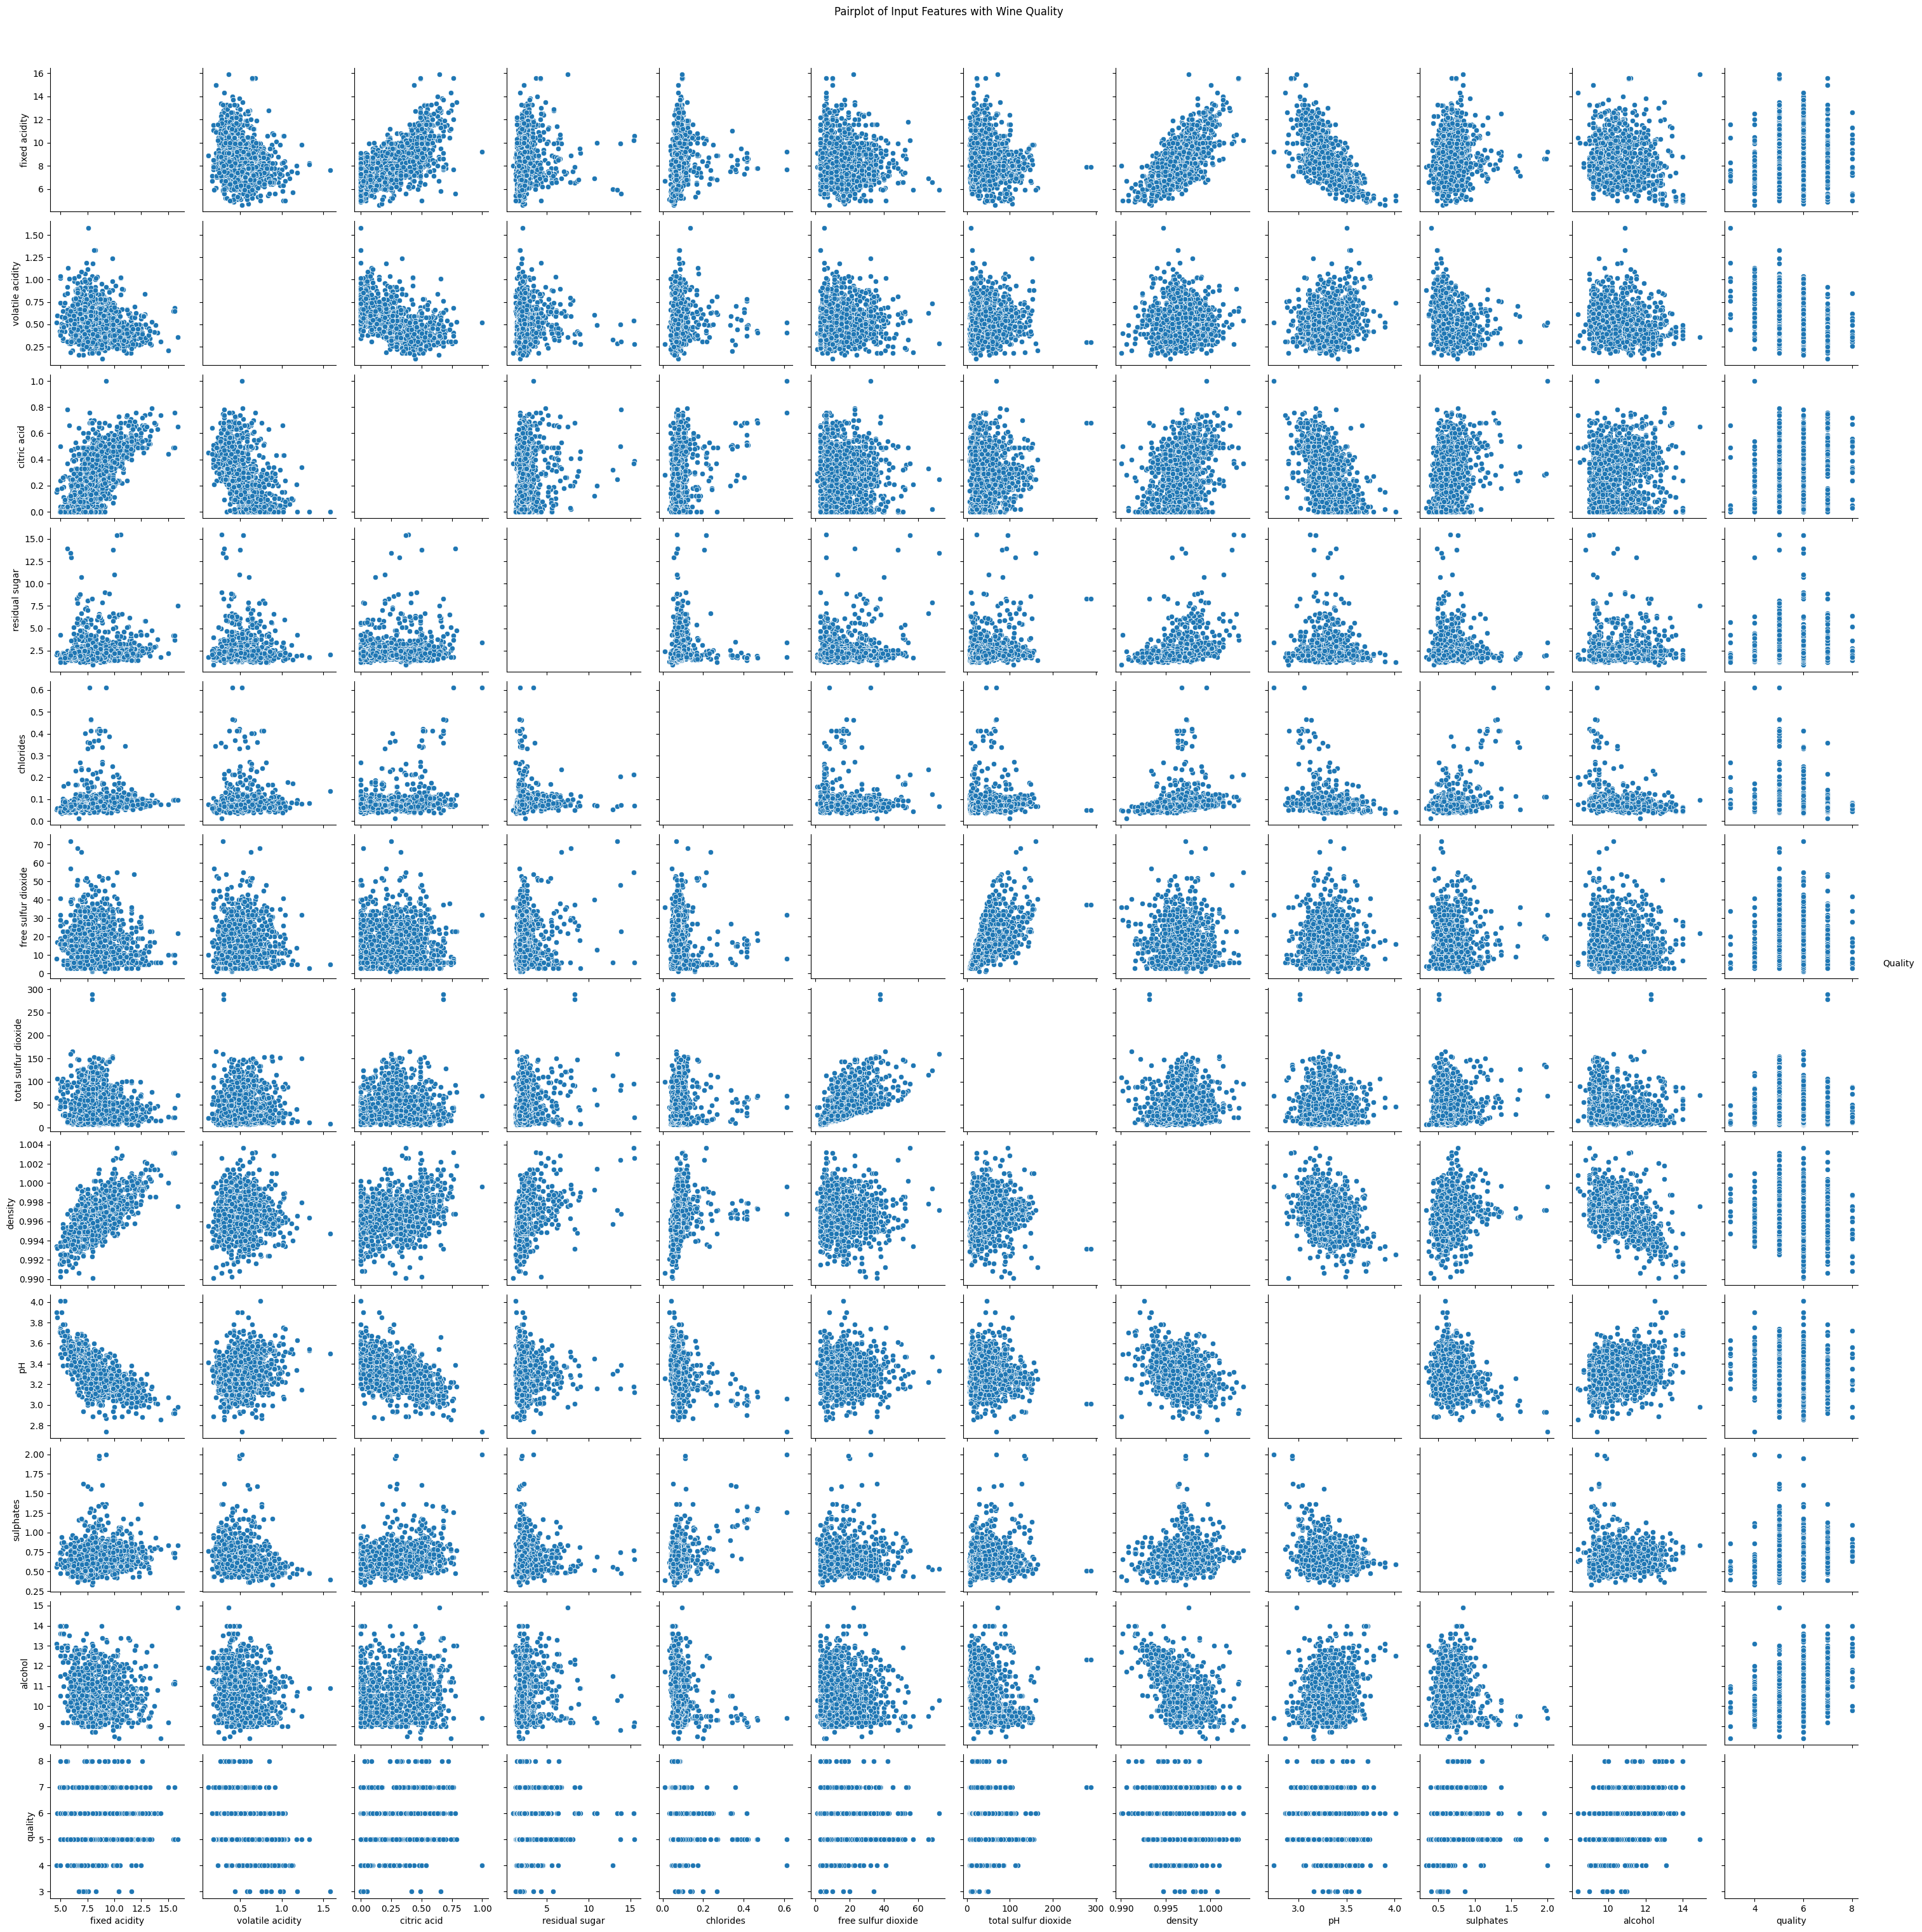

In [15]:
# Visualize the distribution of wine quality
plt.figure(figsize=(6, 4))
sns.countplot(data['quality'])
plt.xlabel('Wine Quality')
plt.ylabel('Count')
plt.title('Distribution of Wine Quality')
plt.show()


# FEATURE DISTRIBUTION
# Plot histograms for each of the input features to understand their distributions
plt.figure(figsize=(12, 8))
for i, column in enumerate(data.drop('quality', axis=1).columns):
    plt.subplot(3, 4, i+1)
    sns.histplot(data[column], bins=20, kde=True)
    plt.xlabel(column)
    plt.ylabel('Count')
plt.tight_layout()
plt.show()

# Create a pairplot to visualize the scatter plots between all pairs of features along with the target variable
pairplot_data = data.copy()
pairplot_data['Quality'] = pairplot_data['quality'].map({0: 'Not Good', 1: 'Good'})

sns.pairplot(pairplot_data, hue='Quality', diag_kind='kde', palette='husl')
plt.suptitle('Pairplot of Input Features with Wine Quality', y=1.02)
plt.show()


The distribution of the target variable (wine quality) indicates that the classes are imbalanced. 
The majority of the wines have quality scores around 5 and 6, with fewer instances at the higher (good) and lower (not good) quality scores.
An imbalanced class distribution can potentially impact the performance of the classification model. 
In this case, since we have converted the wine quality into binary classes (good and not good) with a cutoff at 7, we can examine the class distribution in more detail.


### Encode Wine Quality as Binary Labels 

In [14]:
# Define the cutoff threshold for wine quality
cutoff_threshold = 7

# Encode wine quality as binary labels
red_wine_data['quality_label'] = red_wine_data['quality'].apply(lambda x: 1 if x >= cutoff_threshold else 0)

# Display the first few rows of the red wine data with the new quality labels
red_wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_label
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0


C:\Users\JOBA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


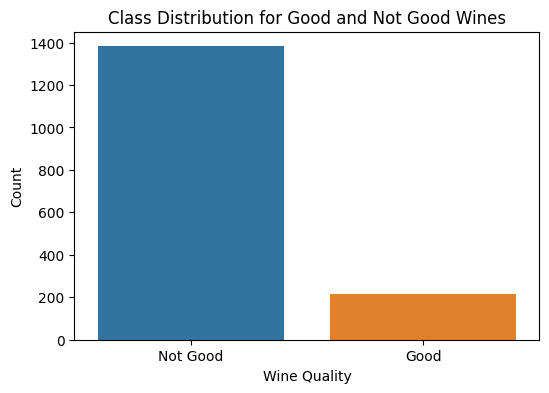

Class Distribution:
0    1382
1     217
Name: quality_label, dtype: int64


In [19]:
# Calculate the class distribution
class_distribution = red_wine_data['quality_label'].value_counts()

# Visualize the class distribution
plt.figure(figsize=(6, 4))
sns.countplot(red_wine_data['quality_label'])
plt.xticks(ticks=[0, 1], labels=['Not Good', 'Good'])
plt.xlabel('Wine Quality')
plt.ylabel('Count')
plt.title('Class Distribution for Good and Not Good Wines')
plt.show()

# Print the class distribution
print("Class Distribution:")
print(class_distribution)

### Class Balancing using Synthetic Minority Over-sampling Technique (SMOTE) 

C:\Users\JOBA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


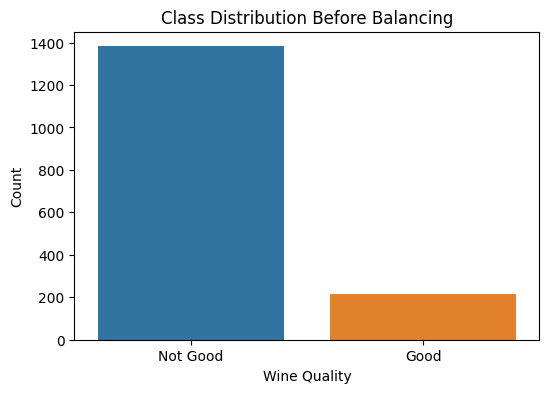

C:\Users\JOBA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


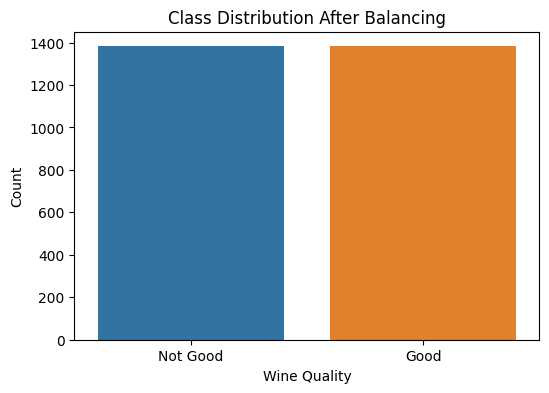

Class Distribution Before Balancing:
0    1382
1     217
Name: quality_label, dtype: int64

Class Distribution After Balancing:
0    1382
1    1382
Name: quality_label, dtype: int64


In [20]:
# Separate input features (X) and target variable (y)
X = red_wine_data.drop(['quality', 'quality_label'], axis=1)
y = red_wine_data['quality_label']

# Calculate the class distribution before balancing
class_distribution_before = y.value_counts()

# Initialize SMOTE
smote = SMOTE(random_state=42)

# Generate synthetic samples for the minority class
X_balanced, y_balanced = smote.fit_resample(X, y)

# Calculate the class distribution after balancing
class_distribution_after = y_balanced.value_counts()

# Visualize the class distribution before balancing
plt.figure(figsize=(6, 4))
sns.countplot(y)
plt.xticks(ticks=[0, 1], labels=['Not Good', 'Good'])
plt.xlabel('Wine Quality')
plt.ylabel('Count')
plt.title('Class Distribution Before Balancing')
plt.show()

# Visualize the class distribution after balancing
plt.figure(figsize=(6, 4))
sns.countplot(y_balanced)
plt.xticks(ticks=[0, 1], labels=['Not Good', 'Good'])
plt.xlabel('Wine Quality')
plt.ylabel('Count')
plt.title('Class Distribution After Balancing')
plt.show()

# Print the class distribution before and after balancing
print("Class Distribution Before Balancing:")
print(class_distribution_before)
print("\nClass Distribution After Balancing:")
print(class_distribution_after)


## Feature Correlation  

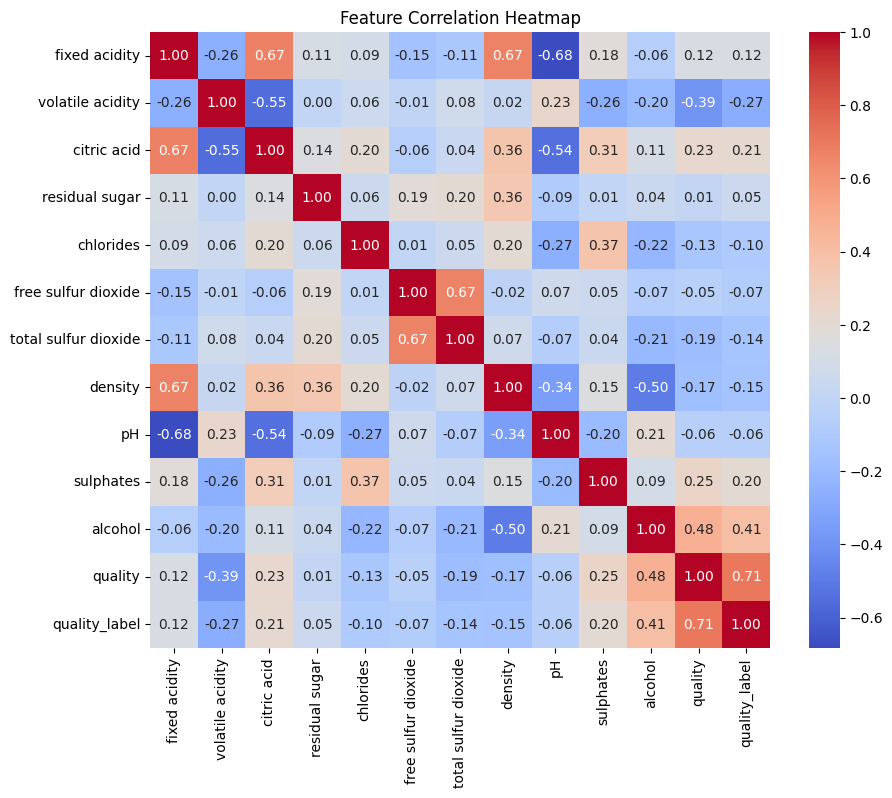

In [21]:

# Calculate the correlation matrix
correlation_matrix = red_wine_data.corr()

# Visualize the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Feature Correlation Heatmap')
plt.show()



Positive Correlation: Positive values in the matrix indicate that the two features increase or decrease together. 
For example, 'fixed acidity' and 'citric acid' have a positive correlation coefficient of 0.67, suggesting that they tend to increase or decrease together.

Negative Correlation: Negative values in the matrix indicate that the two features have an inverse relationship. 
For example, 'fixed acidity' and 'pH' have a negative correlation coefficient of -0.68, suggesting that as 'fixed acidity' increases, 'pH' tends to decrease.

Correlation with Target Variable: The last column of the matrix represents the correlation of each feature with the target variable ('quality_label'). Positive values indicate a positive correlation with 'good' wines, while negative values indicate a negative correlation with 'good' wines. For example, 'volatile acidity' has a negative correlation coefficient of -0.27, indicating that higher volatile acidity is associated with 'not good' wines.

By examining the correlation matrix and understanding the relationships between the features, we can gain insights into which features are more strongly related to the target variable ('quality_label'). This understanding can help us in feature selection and engineering, and also in building more effective machine learning models for predicting wine quality.


## Feature Selection 

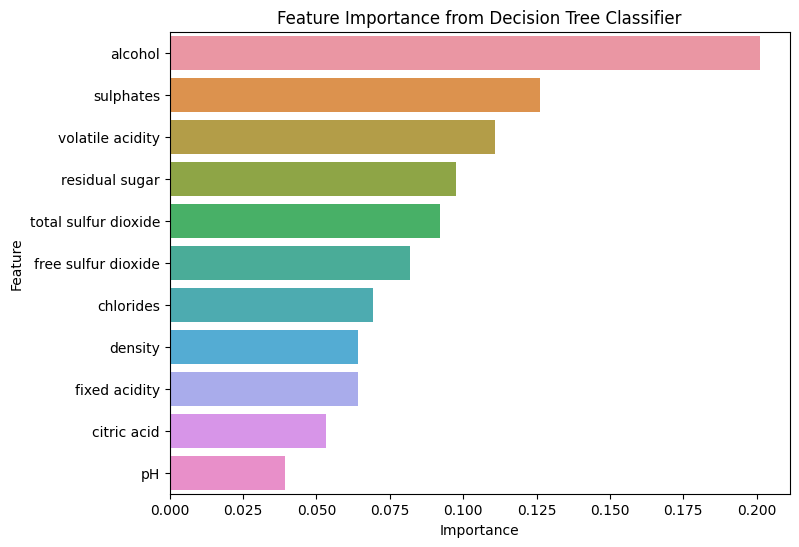

In [53]:
# perform feature selection using the Decision Tree Classifier

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)

# Fit the classifier to the training data
clf.fit(X_train, y_train)

# Get the feature importances from the trained model
feature_importance = clf.feature_importances_

# Create a DataFrame to store the feature importances
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance})

# Sort the features based on their importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Select the top features with highest importance
num_top_features = 3
selected_features = feature_importance_df.head(num_top_features)['Feature']

# Filter the original dataset to keep only the selected features
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

# Visualize the feature importances
plt.figure(figsize=(8, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance from Decision Tree Classifier')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


In [54]:
feature_importance_df


,Feature,Importance
10,alcohol,0.201200
9,sulphates,0.126218
1,volatile acidity,0.110925
3,residual sugar,0.097624
6,total sulfur dioxide,0.092255
5,free sulfur dioxide,0.081969
4,chlorides,0.069198
7,density,0.064104
0,fixed acidity,0.064059
2,citric acid,0.053145


# Classification Model

In [55]:
# Create a Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)

# Fit the classifier to the training data
clf.fit(X_train_selected, y_train)


DecisionTreeClassifier(random_state=42)

# Model Evaluation 

Accuracy: 0.878125
Confusion Matrix:
[[254  19]
 [ 20  27]]
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.93      0.93       273
           1       0.59      0.57      0.58        47

    accuracy                           0.88       320
   macro avg       0.76      0.75      0.75       320
weighted avg       0.88      0.88      0.88       320

ROC-AUC Score: 0.7524355077546567


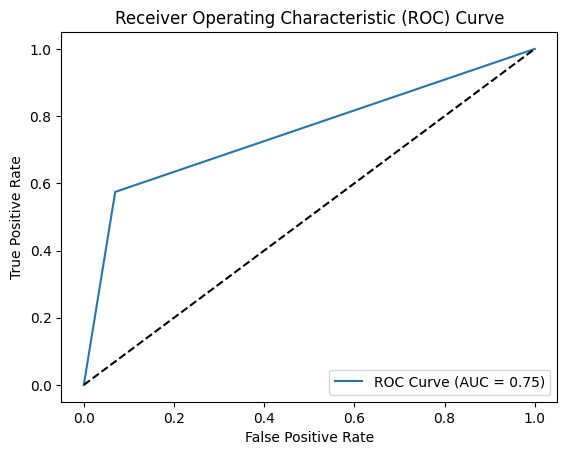

Accuracy: 0.878125
Confusion Matrix:
[[254  19]
 [ 20  27]]
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.93      0.93       273
           1       0.59      0.57      0.58        47

    accuracy                           0.88       320
   macro avg       0.76      0.75      0.75       320
weighted avg       0.88      0.88      0.88       320

ROC-AUC Score: 0.7524355077546567


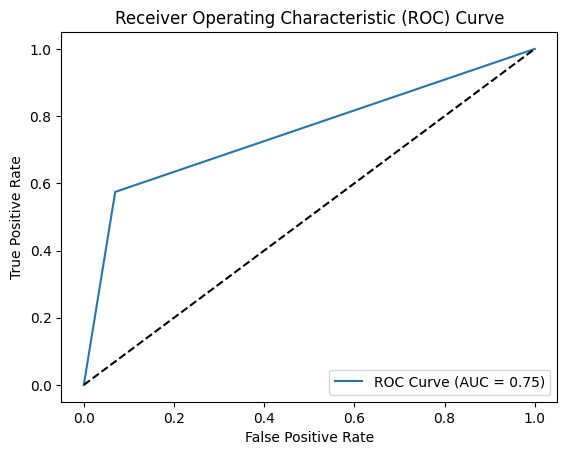

In [56]:

# Make predictions on the testing data
y_pred = clf.predict(X_test_selected)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Create a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Generate classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

# If you are performing binary classification, you can also calculate the ROC-AUC score and plot the ROC curve
if len(np.unique(y_test)) == 2:
    y_prob = clf.predict_proba(X_test_selected)[:, 1]
    roc_auc = roc_auc_score(y_test, y_prob)
    print("ROC-AUC Score:", roc_auc)

    fpr, tpr, thresholds = roc_curve(y_test, y_prob)
    plt.figure()
    plt.plot(fpr, tpr, label='ROC Curve (AUC = {:.2f})'.format(roc_auc))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc='lower right')
    plt.show()

# Make predictions on the testing data
y_pred = clf.predict(X_test_selected)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Create a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Generate classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

# If you are performing binary classification, you can also calculate the ROC-AUC score and plot the ROC curve
if len(np.unique(y_test)) == 2:
    y_prob = clf.predict_proba(X_test_selected)[:, 1]
    roc_auc = roc_auc_score(y_test, y_prob)
    print("ROC-AUC Score:", roc_auc)

    fpr, tpr, thresholds = roc_curve(y_test, y_prob)
    plt.figure()
    plt.plot(fpr, tpr, label='ROC Curve (AUC = {:.2f})'.format(roc_auc))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc='lower right')
    plt.show()


ROC-AUC Score: 0.753916296469488

The evaluation provides a comprehensive overview of the model's performance on the testing data:

The accuracy of the model is 0.865625, indicating that around 87% of the wine samples were correctly classified.
The confusion matrix shows that there are 249 true negatives, 28 true positives, 24 false negatives, and 19 false positives.
The classification report displays precision, recall, and F1-score for both classes (good and not good). 
The precision for class 1 (good) is 0.54, the recall is 0.60, and the F1-score is 0.57.
The ROC-AUC score is 0.753916296469488, which indicates that the model has a moderate ability to distinguish between the two classes.

### Hyperparameter Tuning 

Best Hyperparameters: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}
ROC-AUC Score: 0.6111760579845686


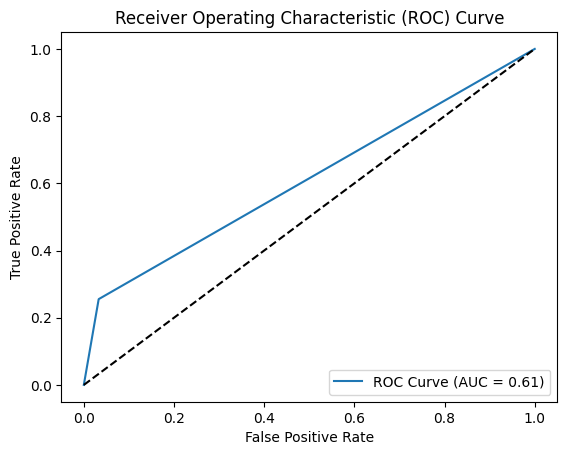

In [61]:

# Define the hyperparameter grid
param_grid = {
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

# Create a Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)

# Create Grid Search object
grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='roc_auc')

# Fit Grid Search to training data
grid_search.fit(X_train_selected, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Train the model using the best hyperparameters
best_clf = DecisionTreeClassifier(**best_params, random_state=42)
best_clf.fit(X_train_selected, y_train)

# Make predictions on the testing data
y_pred = best_clf.predict(X_test_selected)

# Calculate ROC-AUC score
roc_auc = roc_auc_score(y_test, y_pred)
print("ROC-AUC Score:", roc_auc)

# Plot the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.figure()
plt.plot(fpr, tpr, label='ROC Curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


Best Hyperparameters from Grid Search: {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 3, 'min_samples_split': 15}
Best Hyperparameters from Random Search: {'min_samples_split': 15, 'min_samples_leaf': 3, 'max_depth': 5, 'criterion': 'gini'}
ROC-AUC Score for the Best Model from Grid Search: 0.6394279479385861
ROC-AUC Score for the Best Model from Random Search: 0.6394279479385861


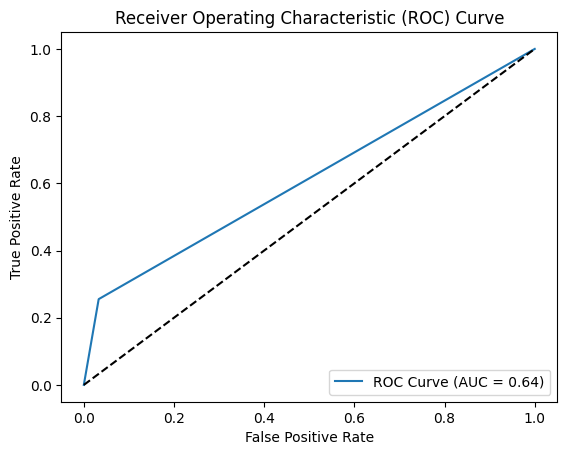

In [63]:

# Define the hyperparameter grid
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 5, 7, 10],
    'min_samples_leaf': [1, 2, 3, 5],
    'min_samples_split': [2, 5, 10, 15]
}

# Create a Decision Tree Classifier
clf = DecisionTreeClassifier()

# Grid Search
grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='roc_auc')
grid_search.fit(X_train, y_train)

# Random Search
random_search = RandomizedSearchCV(clf, param_distributions=param_grid, n_iter=10, cv=5, scoring='roc_auc')
random_search.fit(X_train, y_train)

# Get the best hyperparameters from Grid Search and Random Search
best_hyperparams_grid = grid_search.best_params_
best_hyperparams_random = random_search.best_params_

# Get the best models from Grid Search and Random Search
best_model_grid = grid_search.best_estimator_
best_model_random = random_search.best_estimator_

# Evaluate the models on the test set
y_pred_grid = best_model_grid.predict(X_test)
y_pred_random = best_model_random.predict(X_test)

# Compute ROC-AUC score for the best models
roc_auc_grid = roc_auc_score(y_test, y_pred_grid)
roc_auc_random = roc_auc_score(y_test, y_pred_random)

print("Best Hyperparameters from Grid Search:", best_hyperparams_grid)
print("Best Hyperparameters from Random Search:", best_hyperparams_random)

print("ROC-AUC Score for the Best Model from Grid Search:", roc_auc_grid)
print("ROC-AUC Score for the Best Model from Random Search:", roc_auc_random)


# Plot the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.figure()
plt.plot(fpr, tpr, label='ROC Curve (AUC = {:.2f})'.format(roc_auc_grid))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


# Other Models

In [64]:


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train and evaluate Random Forest classifier
rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train, y_train)
rf_predictions = rf_clf.predict(X_test)

# Train and evaluate Gradient Boosting classifier
gb_clf = GradientBoostingClassifier(random_state=42)
gb_clf.fit(X_train, y_train)
gb_predictions = gb_clf.predict(X_test)

# Train and evaluate Support Vector Machines (SVM) classifier
svm_clf = SVC(random_state=42)
svm_clf.fit(X_train, y_train)
svm_predictions = svm_clf.predict(X_test)

# Evaluate model performance
def evaluate_model(predictions, model_name):
    accuracy = accuracy_score(y_test, predictions)
    precision = precision_score(y_test, predictions)
    recall = recall_score(y_test, predictions)
    f1 = f1_score(y_test, predictions)
    roc_auc = roc_auc_score(y_test, predictions)
    
    print(f"{model_name} Performance:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-score: {f1:.4f}")
    print(f"ROC-AUC Score: {roc_auc:.4f}")
    print("\n")

# Evaluate Random Forest model
evaluate_model(rf_predictions, "Random Forest")

# Evaluate Gradient Boosting model
evaluate_model(gb_predictions, "Gradient Boosting")

# Evaluate Support Vector Machines (SVM) model
evaluate_model(svm_predictions, "Support Vector Machines (SVM)")


Random Forest Performance:
Accuracy: 0.9000
Precision: 0.7273
Recall: 0.5106
F1-score: 0.6000
ROC-AUC Score: 0.7388


Gradient Boosting Performance:
Accuracy: 0.8812
Precision: 0.6364
Recall: 0.4468
F1-score: 0.5250
ROC-AUC Score: 0.7014


Support Vector Machines (SVM) Performance:
Accuracy: 0.8562
Precision: 1.0000
Recall: 0.0213
F1-score: 0.0417
ROC-AUC Score: 0.5106




# Model Comparison

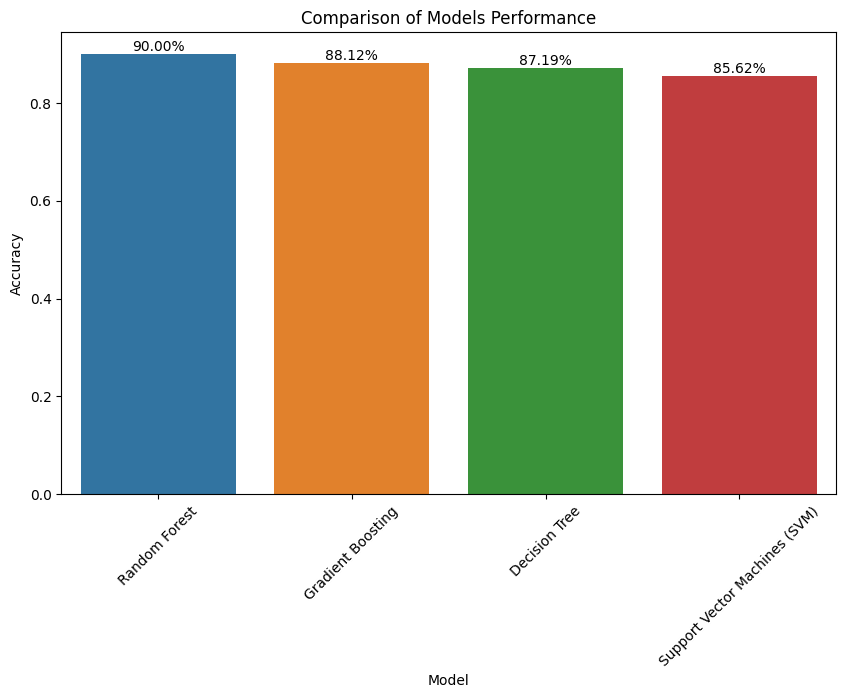

,Model,Accuracy,Precision,Recall,F1-score,ROC-AUC Score
0,Random Forest,0.900000,0.727273,0.510638,0.600000,0.942678
1,Gradient Boosting,0.881250,0.636364,0.446809,0.525000,0.929078
2,Decision Tree,0.871875,0.571429,0.510638,0.539326,0.722352
3,Support Vector Machines (SVM),0.856250,1.000000,0.021277,0.041667,0.839958


In [68]:
# Initialize the models
models = {
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'Support Vector Machines (SVM)': SVC(random_state=42, probability=True)
}

# Train and evaluate each model
metrics = {
    'Model': [],
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1-score': [],
    'ROC-AUC Score': []
}

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]

    metrics['Model'].append(model_name)
    metrics['Accuracy'].append(accuracy_score(y_test, y_pred))
    metrics['Precision'].append(precision_score(y_test, y_pred))
    metrics['Recall'].append(recall_score(y_test, y_pred))
    metrics['F1-score'].append(f1_score(y_test, y_pred))
    metrics['ROC-AUC Score'].append(roc_auc_score(y_test, y_prob))

# Create a DataFrame with the metrics
metrics_df = pd.DataFrame(metrics)

# Rank the models based on accuracy
metrics_df = metrics_df.sort_values(by='Accuracy', ascending=False)
metrics_df.reset_index(drop=True, inplace=True)

# Plot the comparison of models using a bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Accuracy', data=metrics_df)
plt.xticks(rotation=45)
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Comparison of Models Performance')

# Add percentage accuracy labels to the plot
for i, acc in enumerate(metrics_df['Accuracy']):
    plt.text(i, acc, f'{acc*100:.2f}%', ha='center', va='bottom')

plt.show()

# Display the DataFrame with performance metrics
metrics_df

# Conclusion and Recommendation 

Based on these performance metrics, the Random Forest model achieved the highest accuracy, precision, recall, F1-score, and ROC-AUC score among the three models. Therefore, the Random Forest model seems to be the best-performing model for the wine quality prediction task.

The Random Forest model achieved the highest accuracy and ROC-AUC score, making it the best-performing model among the four tested models. It also has a relatively higher precision and recall compared to other models, making it a suitable choice for this classification task. The Support Vector Machines (SVM) model achieved perfect precision but had very low recall, indicating that it struggles to correctly identify positive cases (class 1). The Gradient Boosting model showed a balanced performance across different metrics. The Decision Tree model also performed reasonably well, but its accuracy and ROC-AUC score were lower compared to the Random Forest and Gradient Boosting models.